# 🟦 Cleaning Data – Kaggle Course

This is my personal notebook for practicing the **Kaggle Data Cleaning Course**.  
The goal is to learn practical, job-relevant techniques such as handling missing values, duplicates, incorrect data types, and inconsistent entries.

In addition to following the course content, I’ve also made meaningful custom additions and improvements to deepen my understanding and explore real-world challenges more thoroughly.

---

**Course Link**  
- [Kaggle: Data Cleaning Course](https://www.kaggle.com/learn/data-cleaning)

**Datasets Used**

- [Building Permit Applications Data (San Francisco)](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data?utm_source=chatgpt.com)  
- [Earthquake Database (USGS)](https://www.kaggle.com/datasets/usgs/earthquake-database?utm_source=chatgpt.com)  
- [Kickstarter Projects Dataset](https://www.kaggle.com/datasets/kemical/kickstarter-projects)
- [Pakistani Intellectual Capital Data](https://www.kaggle.com/datasets/henryjavier/pakistan-intellectual-capitalcsv)

## 1️⃣ Module: Handling Missing Values

In this module, I’m learning how to **detect, understand, and handle missing values**, depending on the context.

**Learning goals:**
- Identify missing values using `isnull()` and `sum()`
- Understand why data is missing
- Apply appropriate strategies:
  - Remove rows or columns with missing data (`dropna()`)
  - Fill missing values (`fillna()`) using methods like median, mode, or a specific value

I’m working with the `Building_Permits.csv` dataset, as used in the Kaggle course.

### 🔵 Step 1: Load the Data and Take a First Look

To start cleaning, we first need to **load the dataset** and get a **basic overview** of its structure.

In this step:
- We import `pandas` and `numpy`, our main tools for data handling
- We read in the full dataset using `pd.read_csv()`
- We set a **random seed** with `np.random.seed(0)` to ensure that any randomness in cleaning or sampling is reproducible

**Goal:**  
Prepare the data for inspection and ensure a consistent environment for further cleaning steps.

---
In the follow-up exercise, I apply these skills to the [Building Permit Applications Data (San Francisco)](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data?utm_source=chatgpt.com).

In [65]:
# Install necessary packages
!pip install pandas numpy

# Import libraries
import pandas as pd
import numpy as np

# Load dataset
b_permits = pd.read_csv("data_cleaning_kaggle/data/Building_Permits.csv")

# Set seed for reproducibility
np.random.seed(0)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 🔵 Step 2: Take a First Look at the Data

Before handling missing values, I’m previewing the dataset to:
- confirm that it was loaded correctly
- get a first impression of the structure and content
- spot visible `NaN` (missing values) early on

I’ll use `.head()` to preview the first 5 rows.


In [66]:
# Preview first 5 rows
b_permits.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### 🔵 Step 3: How Many Missing Data Points Do We Have?

Now that the dataset is loaded, I want to understand **how much data is missing**.  
This helps prioritize which columns might need to be cleaned or removed.

I'll count the missing values **per column** using `.isnull().sum()`  
Then, I preview the first few results to get a quick overview.


In [67]:
# count missing values per column
missing_values_count = b_permits.isnull().sum()

# show the first 20 columns
missing_values_count[0:20]


Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
dtype: int64

### 🔵 Step 4 How much of the data is missing?

To understand the scale of the problem, we calculate the **total number of cells** in the dataset and compare it to the **total number of missing values**. This gives us a clear percentage of how much data is missing overall.


In [68]:
# Get total number of rows
count_rows = b_permits.shape[0]
print(f"Number of rows: {count_rows}")

# Get total number of columns
count_cols = b_permits.shape[1]
print(f"Number of columns: {count_cols}")

# Calculate the total number of cells (rows × columns)
total_cells = np.prod(b_permits.shape)
print(f"Total number of cells: {total_cells}")

# Sum up all missing values across all columns
total_missing = missing_values_count.sum()
print(f"Total missing values: {total_missing}")

# Calculate the percentage of missing data
percent_missing = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {percent_missing:.2f}%")


Number of rows: 23412
Number of columns: 21
Total number of cells: 491652
Total missing values: 145439
Percentage of missing data: 29.58%


### 🔵 Step 5: Remove rows with missing values
Before performing more complex cleaning techniques, a quick option is to simply remove all rows that contain any missing values. This is done using dropna() with default parameters.

> Warning: This can result in a major loss of data if most rows contain at least one NaN.

In [69]:
# Drop all rows that contain at least one missing value
b_permits_rows_dropped = b_permits.dropna()

# Display how many rows we had before and after
print(f"Rows in original dataset: {b_permits.shape[0]}")
print(f"Rows after dropping missing values: {b_permits_rows_dropped.shape[0]}")



Rows in original dataset: 23412
Rows after dropping missing values: 14


### 🔵 Step 6: Remove columns with missing values
Since dropping rows often removes too much data, another approach is to remove only the columns that contain any missing values.
We use dropna(axis=1) to do this. This way, we preserve all complete rows and only remove the problematic columns.

In [70]:
# Drop all columns that contain at least one missing value
b_permits_cols_dropped = b_permits.dropna(axis=1)

# Display how many columns we had before and after
print(f"Columns in original dataset: {b_permits.shape[1]}")
print(f"Columns after dropping missing values: {b_permits_cols_dropped.shape[1]}")


Columns in original dataset: 21
Columns after dropping missing values: 12


### 🔵 Step 7: Imputation (Filling Missing Values)

When you decide not to drop rows or columns, imputation lets you fill in missing values with something reasonable. This keeps the structure of your data intact.

We’ll explore six common and quick strategies:

1. **Fill numerical fields with zero**  
   Quick, but may distort distributions or affect downstream calculations.

2. **Fill numerical fields with the column mean**  
   Works well for normally distributed data.

3. **Fill numerical fields with the column median**  
   More robust for skewed data or outliers.

4. **Fill categorical fields with the mode**  
   Ideal for non-numeric columns where the most frequent value makes sense.

5. **Backfill, then fill with zero**  
   Replaces missing values with the next valid value **below** in the same column (`bfill`), then fills remaining missing values (e.g., at the end of a column) with **0**.  
   Useful for **time-ordered data** or datasets where the **sequence matters**.

6. **Backfill, then forward fill, then fill with the mode**  
   A more robust strategy: first fills missing values with the next valid value below (`bfill`), then with the previous value above (`ffill`), and finally replaces any remaining missing values with the **column-wise mode**.  
   Especially useful when **no valid neighbor values** exist at either end of a column (e.g., top or bottom of time series).  
   Works well for both numerical and categorical data if logical order is important.

---

**Important:**

The best imputation strategy depends on the **distribution and data type**:

- For **normally distributed numerical columns**, the **mean** may work well.  
- For **skewed numerical columns**, the **median** is often more robust.  
- For **categorical columns**, the **mode** (most frequent value) is typically used.  
- For **ordered observations**, **backfilling** (or forward filling) followed by a fallback value (e.g. 0 or mode) can preserve logical consistency.

**Before choosing a strategy, it's good practice to examine the column distribution and the role of time or order in your dataset.**


In [71]:
# Option 1: Fill all NaNs/missing values with 0

b_permits_filled_zero = b_permits.fillna(0)


In [72]:
# Option 2: Fill missing values in numerical columns with the mean
b_permits_filled_mean = b_permits.fillna(b_permits.mean(numeric_only=True))


In [73]:
# Option 3: Fill missing values in numerical columns with the median
b_permits_filled_median = b_permits.fillna(b_permits.median(numeric_only=True))

In [74]:
# Option 4: Fill missing values in categorical columns with the mode (most frequent value)
# Nur kategorische Spalten auswählen
categorical_cols = b_permits.select_dtypes(include='object')

# Modus je Spalte berechnen (nur für diese Spalten)
modes = categorical_cols.mode().iloc[0]

# Nur diese Spalten befüllen
b_permits[categorical_cols.columns] = categorical_cols.fillna(modes)



In [75]:
# Option 5: First backfill missing values from the next row, then fill remaining with 0
b_permits_filled = b_permits.bfill().ffill().fillna(b_permits.mode().iloc[0])



In [76]:
# Option 6: Use backfill, then forward fill, then fill remaining with column mode (robust for categorical data)
b_permits_filled = b_permits.bfill().ffill().fillna(b_permits.mode().iloc[0])


## 2️⃣ Module: Scaling vs. Normalization

In this module, I’m learning how to **scale and normalize numeric data**, and what the difference is between the two.

### 🔵 Learning goals
- Understand the conceptual difference between **scaling** and **normalization**
- Apply **min-max scaling** to rescale data to a fixed range (e.g., 0–1)
- Apply **Box-Cox normalization** to reshape data into a normal distribution

We’re working with **artificial exponential data**, created using NumPy.

#### 🔹 Conceptual Differences

- **Scaling** changes the **range** of data (e.g., to [0, 1])  
- **Normalization** changes the **shape of the distribution** (e.g., to a Gaussian bell curve)

#### 🔹 Min-Max Scaling Formula

To scale a value `x` to the range \([0, 1]\):

$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

---

#### 🔹 Box-Cox Normalization Formula

Given a value `x` and a parameter `\(\lambda\)`, the Box-Cox transformation is defined as:

$$
x_{\text{normalized}} =
\begin{cases}
\frac{x^\lambda - 1}{\lambda}, & \text{if } \lambda \ne 0 \\\\
\ln(x), & \text{if } \lambda = 0
\end{cases}
$$

> **Note:** Box-Cox requires all values \( x > 0 \).

#### 🔹 Interpretation von Lambda `'λ'`

Der Parameter `'λ'` wird automatisch vom Algorithmus gewählt, sodass die resultierenden Daten möglichst normalverteilt sind.  
Unterschiedliche `'λ'`-Werte führen zu verschiedenen Transformationen:

- `'λ = 1'`: keine Transformation  
- `'λ = 0'`: Log-Transformation → `ln(x)`  
- `'λ = 0.5'`: Wurzel-Transformation → `√x`  
- `'λ = -1'`: Kehrwert-Transformation → `1/x`
---
In the follow-up exercise, I apply these skills to the [Building Permit Applications Data (San Francisco)](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data?utm_source=chatgpt.com).

### 🔵 Applying the Learning Goals

In [77]:
#  Install necessary packages (only needed if not already installed)
# Run this once in a Jupyter Notebook or in the terminal
!pip install pandas numpy seaborn matplotlib mlxtend scipy

#  Import libraries
import pandas as pd
import numpy as np

#  Load dataset
b_permits = pd.read_csv("data_cleaning_kaggle/data/ks-projects-201801.csv")

#  Set seed for reproducibility
np.random.seed(0)

#  For plotting
import seaborn as sns
import matplotlib.pyplot as plt

#  For min-max scaling
from mlxtend.preprocessing import minmax_scaling

#  For Box-Cox transformation
from scipy import stats



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 🔹 Scaling

**What it does:**  
Scaling changes the range of your numeric data (e.g., rescaling values between 0 and 1) without altering the shape of the distribution.

**Why it’s useful:**  
Scaling is helpful when you want to ensure that all numeric features are comparable, regardless of their original units or magnitude. This prevents features with large values from having a disproportionate influence on the analysis or model behavior.

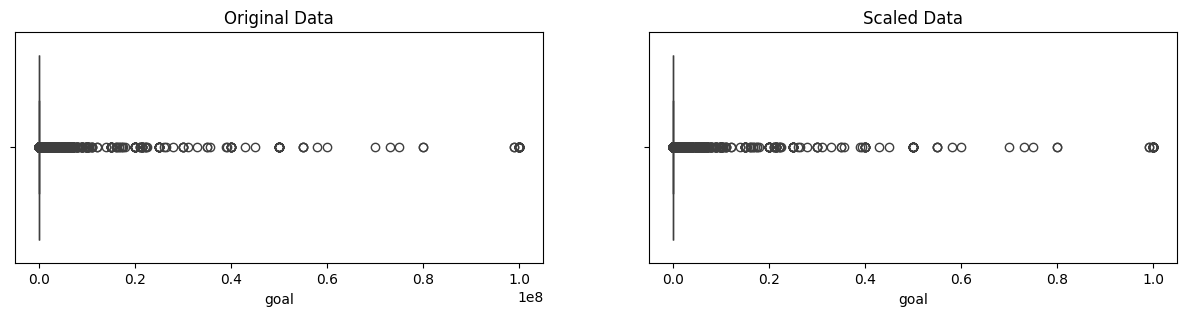

In [78]:
# -----------------------------------------
# ORIGINAL DATA
# -----------------------------------------

# Select and clean the data
usd_goal = b_permits[['goal']].copy()
usd_goal = usd_goal.dropna()

# -----------------------------------------
# SCALED DATA
# -----------------------------------------

# Apply Min-Max Scaling between 0 and 1
scaled_usd_goal = minmax_scaling(usd_goal, columns=['goal'])

# -----------------------------------------
# PLOT COMPARISON (BOXPLOTS)
# -----------------------------------------

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

# Original distribution
sns.boxplot(x=usd_goal['goal'], ax=ax[0])
ax[0].set_title("Original Data")

# Scaled distribution
sns.boxplot(x=scaled_usd_goal['goal'], ax=ax[1])
ax[1].set_title("Scaled Data")

plt.show()


#### 🔹 Normalization

**What it does:**  
Normalization changes the **shape of the distribution** of your numeric data — typically to make it look like a **normal distribution** (a symmetric "bell curve").

**Why it’s useful:**  
Normalization is useful when you're working with statistical techniques or models that **assume normally distributed data**. Transforming your data to resemble a normal distribution improves **model accuracy, validity of statistical tests**, and interpretability of results. It also helps reduce the impact of **outliers and skewness**, making your data more balanced.


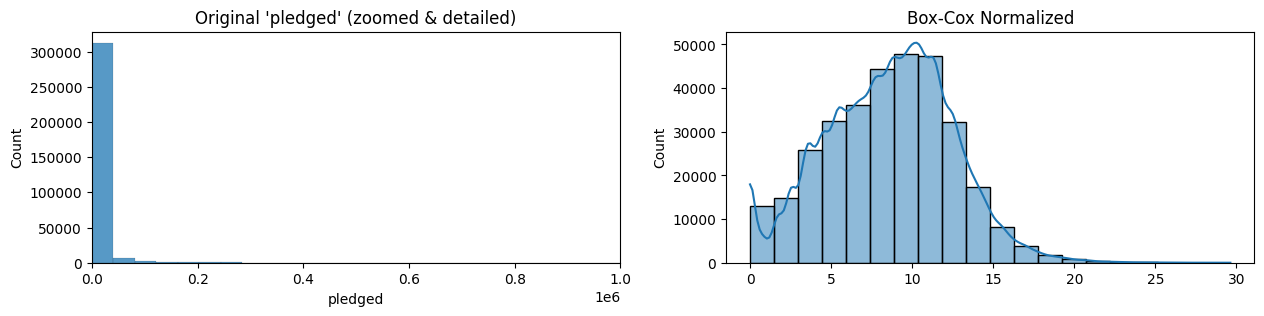

In [79]:
# Load the original dataset
original_data = pd.read_csv("data_cleaning_kaggle/data/ks-projects-201801.csv")

# Select the 'pledged' column and remove missing values
pledged_data = original_data['pledged'].dropna()

# Box-Cox only works with strictly positive values
pledged_data_positive = pledged_data[pledged_data > 0]

# Normalize using Box-Cox transformation (corrected)
normalized_data, fitted_lambda = stats.boxcox(pledged_data_positive)

# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

# LEFT: original 'pledged' values with zoom & fine bins
# LEFT: original 'pledged' values with zoom & fine bins
sns.histplot(pledged_data_positive, ax=ax[0], kde=False, bins=500)
ax[0].set_xlim(0, 1_000_000)  # Bereich sinnvoll gewählt
ax[0].set_title("Original 'pledged' (zoomed & detailed)")



# RIGHT: normalized pledged values
sns.histplot(normalized_data, ax=ax[1], kde=True, bins=20)
ax[1].set_title("Box-Cox Normalized")

plt.show()

## 3️⃣ Module: Parsing Dates

In this module, I’m learning how to **detect, convert, and work with dates** in a dataset using pandas.

**Learning goals:**

- Check the data type of date columns using `.dtype`
- Convert text columns to `datetime` format with `pd.to_datetime()`
- Extract parts of a date (e.g., day, month, year) using `.dt`
- Analyze patterns over time (e.g., find the most common day of the month)

---

In the follow-up exercise, I apply these skills to the [Earthquake Database (USGS)](https://www.kaggle.com/datasets/usgs/earthquake-database?utm_source=chatgpt.com).

In [87]:
# Install necessary packages
!pip install pandas numpy seaborn

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import re  # Used to match text patterns via regular expressions

# Load dataset
earthquakes = pd.read_csv("data_cleaning_kaggle/data/earthquakes.csv")

# Set seed for reproducibility
np.random.seed(0)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 🔵 Step 1: Check the data type of our date column

In this step, I’m taking a first look at the dataset using `head()` and checking the format of the `date` column.

**Goals:**
- Get an overview of the first rows of the dataset
- Check whether the `date` column is already in datetime format or just a string

```python
earthquakes.head()


In [81]:
# Preview the dataset
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### 🔵 Step 2: Check the format of the `date` column

We’re going to work with the `"date"` column from the `earthquakes` DataFrame.  
Before doing any operations, we want to confirm whether this column actually contains valid dates.

To do this, we’ll look at a few values and also check the data type of the column.

---

**Why this matters:**

- When you load a CSV file, `pandas` treats all text-based columns as `object` type by default — which just means regular strings.
- Even if a value *looks like* a date (e.g., `"4/15/07"`), `pandas` doesn’t automatically recognize it as a real date.
- To work properly with dates (e.g., for filtering or extracting parts of the date), the column needs to be in `datetime64` format.

You can check the data type with `.dtype`, even without printing out the actual values.

If you see `'O'` as the dtype, that means it's an `"object"` — in other words, just plain text.  
You can find more about these dtype codes in the  
[NumPy documentation on `dtype.kind`](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind).


In [82]:
# Print the first few values from the 'date' column
print(earthquakes['Date'].head())

# Check the data type
print(earthquakes['Date'].dtype)


0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object
object


In [83]:
# Check the data type
earthquakes['Date'].dtype

dtype('O')

### 🔵 Step 3: Convert the `date` column to real datetime format

Right now, the `date` column contains plain text values (strings), even though they look like dates.  
To work with them properly – for example, to filter by year or extract parts like the month – we need to convert them into real `datetime` objects.

---

**How does pandas know the format?**

To convert text to datetime, we need to tell `pandas` how the date is written using a format string.

Here are some common format codes:
- `%m` → month (e.g., 01 or 12)
- `%d` → day (e.g., 01 or 31)
- `%y` → 2-digit year (e.g., 23 for 2023)
- `%Y` → 4-digit year (e.g., 2023)

**Examples:**
- `"1/17/07"` → `"%m/%d/%y"`
- `"17-1-2007"` → `"%d-%m-%Y"`

---

**Code example**

If our date values look like `"4/15/07"` (month/day/year), we use this code:

```python
# Create a new column with parsed datetime values
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['date'], format="%m/%d/%y")


In [84]:
# Convert the 'date' column into real datetime format (month/day/year with 4-digit year)
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%d/%m/%Y")

# Preview the parsed dates
print(earthquakes['date_parsed'].head())


ValueError: time data "01/15/1965" doesn't match format "%d/%m/%Y", at position 7. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### 🔵 Step 4: Check for inconsistent date formats

Before converting text dates into proper datetime objects, we need to make sure that all values in the `'Date'` column follow the same format.

Why?  
If the column contains multiple different date formats (e.g., some with slashes, others with dashes, some with 2-digit years, others with 4-digit years), parsing will fail unless we account for that.  
That’s likely what caused the error earlier — we assumed one format (`"%m/%d/%Y"`), but the actual values include other formats as well.

To avoid this, let’s first print some unique date values and inspect them manually.  
If they all follow the same structure, we can safely define the correct format.  
If not, we’ll need a more flexible parsing approach.


In [88]:
# Function to classify date format using regular expressions
def classify_format(date_str):
    if re.match(r"^\d{2}/\d{2}/\d{4}$", date_str):
        return "MM/DD/YYYY"
    elif re.match(r"^\d{4}-\d{2}-\d{2}T", date_str):
        return "ISO8601"
    else:
        return "Other/Unknown"

# Apply the function to all non-null values in the 'Date' column
format_counts = earthquakes['Date'].dropna().apply(classify_format).value_counts()

# Display the number of occurrences per format
print(format_counts)


Date
MM/DD/YYYY    23409
ISO8601           3
Name: count, dtype: int64


### 🔵 Step 5: Convert to datetime format

Now that we’ve checked for inconsistencies, we can convert the `"Date"` column into proper datetime format using `pd.to_datetime()`.

We’ll try two different options:

**Option 1:** Specify the date format explicitly
This is the recommended approach if your dates follow a consistent pattern (e.g. `"%m/%d/%Y"`).  
It's fast and avoids guessing errors.

**Option 2:** Let pandas infer the format
If the date formats vary slightly, we can let pandas guess the structure by using `infer_datetime_format=True`.  
It's slower and might be unreliable if the input is too inconsistent.

**Why not always use Option 2?**  
1. Pandas might guess the wrong format, especially if the entries are messy.  
2. It's significantly slower than providing the format explicitly.


In [89]:
# Option 1: Convert using a known, consistent date format (e.g. MM/DD/YYYY)
earthquakes['date_parsed_manual'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y", errors='coerce')

# Preview the result
print(earthquakes['date_parsed_manual'].head())


0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed_manual, dtype: datetime64[ns]


In [90]:
# Option 2: Convert by letting pandas guess the format
earthquakes['date_parsed_inferred'] = pd.to_datetime(earthquakes['Date'], errors='coerce')

# Preview the result
print(earthquakes['date_parsed_inferred'].head())


0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed_inferred, dtype: datetime64[ns]


### 🔵 Step 6: Get the day of the month from the date

Now that we’ve successfully converted our text dates into real datetime objects, we can extract specific parts of the date.  
One useful example is finding out **on which day of the month** each event occurred.

This helps us explore patterns — for instance, do certain events tend to happen early, mid, or late in the month?

To get the day from each date, we use the `.dt.day` accessor, which pulls out the day number (1–31) from each datetime.

Let’s try it now.


In [91]:
# Get the day of the month from the parsed date column
day_of_month_earthquakes = earthquakes['date_parsed_manual'].dt.day

# Preview the result
day_of_month_earthquakes.head()


0    2.0
1    4.0
2    5.0
3    8.0
4    9.0
Name: date_parsed_manual, dtype: float64

### 🔵 Step 7: Plot the day of the month to validate date parsing

After converting our date column to proper datetime format, it’s a good idea to double-check if everything was parsed correctly.  
One common mistake is mixing up the **day** and **month**, especially if the dates come in different formats.

To do a quick validation, we’ll plot a histogram showing how often each **day of the month** appears in the data.  
If parsing was correct, we should see values between 1 and 31, and a fairly even distribution — maybe with a small dip at 31 (since not all months have 31 days).

This plot helps us catch any unexpected patterns or parsing errors.

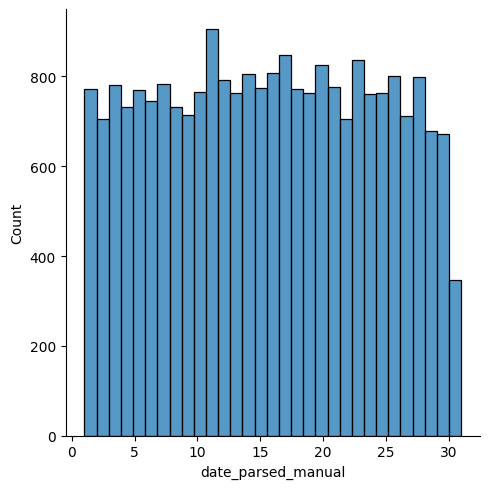

In [92]:
# 1. Remove missing values (NA) from the parsed date column
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# 2. Plot a histogram of the day values (1–31)
# 'kde=False' disables the smooth curve, 'bins=31' sets one bin per day
sns.displot(day_of_month_earthquakes, kde=False, bins=31)


## 4️⃣ Module: Character Encodings

In this part of the course, we explore **character encodings** – the rules that computers use to translate raw byte data into readable text.

---

Character encodings define how raw binary (e.g. `01001101`) gets mapped into human-readable text.  
When text is saved in one encoding but read using a different one, strange characters can appear.

This error is called **mojibake** — a Japanese word meaning “scrambled text”.  
It happens when the software interprets bytes using the **wrong encoding**, causing weird outputs like:

```
æ–‡å—åŒ–ã??
```

Most text files today use **UTF-8**, which is also the default in Python 3.  
But older files might use encodings like **Windows-1252** or **ISO-8859-1** — and that causes trouble.

To avoid encoding problems:
- Detect the correct encoding early (e.g. with `charset_normalizer`)
- Always convert input data to **UTF-8** as soon as possible

---
Imagine this:

You receive a letter written in English, but you mistakenly think it's Japanese, so you grab a Japanese dictionary to read it.

What happens?
You get nonsense like this:

“Hello” → 誤解驚変?!

That's exactly what mojibake is:
You're using the wrong dictionary (encoding) to interpret the message.

The Key Rule:
Always decode text using the same language (encoding) it was written in!

If the text was saved in UTF-8, you must also read it with UTF-8.
If you read UTF-8 as ASCII or Windows-1252, you’ll get garbage characters – that’s mojibake.

---

In the follow-up exercise, I apply these skills to the [Kaggle lesson on character encodings and data types](https://www.kaggle.com/code/alexisbcook/character-encodings/data).

In [93]:
!pip install pandas numpy charset-normalizer

#  Import libraries
import pandas as pd
import numpy as np
import charset_normalizer

#  Set seed for reproducibility
np.random.seed(0)


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 🔵 Step 1: Encoding vs. Bytes – Simple Python String Tests

In this step, we compare **text strings** and **byte sequences** in Python.  
We test how to convert strings to bytes and back – and see what happens during encoding.

---

***Key Takeaways***

- Strings are human-readable and of type `str`.
- Bytes are encoded versions of strings and of type `bytes`.
- The euro sign `€` becomes a 3-byte sequence in UTF-8: `\xe2\x82\xac`.
- We must decode using the **same encoding** (`utf-8`) to get the correct output.

---

***What do `.encode()` and `.decode()` do?***

When working with text data in Python, we often need to **convert between strings and bytes**.  
This is where `.encode()` and `.decode()` come into play:

---

***.encode(): String → Bytes***

- Takes a **human-readable string** (like `"Hello €"`) and **encodes** it into a **byte format** the computer can store or transmit.
- You must specify the encoding (e.g. `"utf-8"` or `"ascii"`).

```python
"Hello €".encode("utf-8")
```

---

***.decode(): Bytes → String***

- Takes a **byte sequence** (like `b'\xe2\x82\xac'`) and **decodes** it into a **human-readable string**.
- You must use the **same encoding** that was originally used to create the bytes.

```python
b'\xe2\x82\xac'.decode("utf-8")
```

---


In [94]:
# Start with a simple string
before = "This is the euro symbol: €"
print(type(before))     # <class 'str'>

# Convert to bytes using UTF-8
after = before.encode("utf-8", errors="replace")
print(type(after))      # <class 'bytes'>
print(after)            # Shows b'This is the euro symbol: \xe2\x82\xac'

# Convert it back to string (correctly)
print(after.decode("utf-8"))


<class 'str'>
<class 'bytes'>
b'This is the euro symbol: \xe2\x82\xac'
This is the euro symbol: €


### 🔵 Step 2: What Happens with Wrong Encoding?

When you try to decode text using the **wrong character encoding**, Python doesn't know how to translate certain byte sequences into readable characters.

For example, **ASCII** can only represent standard English characters.  
If your byte data contains symbols like `€`, decoding with ASCII will fail — because ASCII doesn't have a rule for what byte `0xe2` (used in UTF-8 for €) should mean.

This will raise a `UnicodeDecodeError`.

**Analogy**: Think of it like using a **CD player** to play a **cassette tape**. The data is there — but you're using the wrong decoder, so it won't work!

---

If we try to decode using ASCII **without handling the error**, we get:

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)


But if we use `errors="replace"` during encoding or decoding, the characters ASCII can’t understand will be replaced with a `?`.  
This makes the string human-readable again, **but the original data is lost**!

Best practice: **Always convert non-UTF-8 input to UTF-8 as early as possible** when working with text data.



In [95]:
# Try decoding with the wrong encoding (ASCII)

print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [96]:
# Start with a string that contains a special character (euro symbol)
before = "This is the euro symbol: €"

# Encode the string into ASCII bytes
# But ASCII can't handle the euro sign (€), so we add errors="replace"
# That means: replace unsupported characters with a "?" placeholder
after = before.encode("ascii", errors="replace")
# Now we try to decode those bytes back into a string
# We're using ASCII again to match the encoding
print(after.decode("ascii"))


This is the euro symbol: ?


### 🔵 Step 4 Reading in files with encoding problems

Most files you work with will probably use **UTF-8** encoding.  
Python expects this by default, so usually everything works fine.

But sometimes you get an error if the file was saved in a **different format** (like Windows-1252 or ISO-8859-1).  
Then Python doesn't understand some characters and shows a **UnicodeDecodeError**.

In [97]:
# Load Dataset
kickstarter_2016 = pd.read_csv("data_cleaning_kaggle/data/ks-projects-201612.csv")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

### 🔵 Step 5: Guess the Encoding with charset_normalizer
Sometimes we don't know which encoding a file uses.
If we try to open the file with the wrong encoding, Python will show a UnicodeDecodeError.

To avoid guessing manually, we can use the charset_normalizer module.
It reads the first 10,000 bytes of the file and tries to guess the encoding.

This is much faster than checking the whole file – and usually works well.

We just look at the beginning of the file, because the first error often happens early in the text.

In [98]:
# Look at the first 10,000 bytes of the file and guess the encoding
with open("data_cleaning_kaggle/data/ks-projects-201612.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# Show the guessed encoding
print(result)


{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


#### 🔹 What’s Happening Here?

**1. `open(..., 'rb')`**
- Opens the file in **binary mode** (`rb = read binary`), so you get **bytes**, not plain text.
- This is important if you want to **detect the encoding** — because you need the raw data.

**2. `rawdata.read(10000)`**
- Reads the **first 10,000 bytes** of the file (not 10,000 characters!).
- That’s usually enough to get a good guess of the file’s encoding.

**3. `charset_normalizer.detect(...)`**
- Tries to **automatically guess the text encoding**.
- It returns a dictionary with:
  - `'encoding'`: the guessed encoding (e.g., `'utf-8'`)
  - `'language'`: the detected language (e.g., `'English'`)
  - `'confidence'`: how sure the algorithm is (value between 0 and 1)

---

**Your Output:**

```python
{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}
```

This means:

- The file is **readable as plain text**.
- The encoding is **Windows-1252**, which is not the default for Python.
- The language is most likely **English**.
- The **confidence score** is `1.0`, which means the detection is **100% reliable**.

Now you can safely read the file using:

```python
df = pd.read_csv("your_file.csv", encoding="Windows-1252")
```


In [99]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("data_cleaning_kaggle/data/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

C:\Users\Sefer Adiyaman\AppData\Local\Temp\ipykernel_9044\1141492884.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("data_cleaning_kaggle/data/ks-projects-201612.csv", encoding='Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


### 🔵 Step 6: What if the encoding `charset_normalizer` guesses isn't right?

Since `charset_normalizer` is basically just a fancy guesser, sometimes it will guess the **wrong encoding**.

🛠️ One thing you can try:
- Try reading **more** or **less** of the file (change `read(10000)` to a bigger or smaller number).
- See if you get a **different result**.
- Then test that encoding instead.

It's not perfect — but it helps improve the chance of getting the correct encoding before opening the file.


### 🔵 Step 7: Saving Your Files with UTF-8 Encoding

Once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to **keep it that way**.

The easiest way to do that:  
Save your files using **UTF-8 encoding**.

Good news:
- **Python uses UTF-8 by default**, so when you save a file (e.g., using `open(..., 'w')`), it will automatically be saved in UTF-8 unless you specify otherwise.

This helps make sure that your files stay readable across different systems and tools.


In [100]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("data_cleaning_kaggle/output/ks-projects-201612-utf8.csv")

## 5️⃣ Module: Cleaning Inconsistent Text Entries

In this module, I’m learning how to **detect and clean inconsistent text data**, especially for categorical columns like `"Country"`.

### 🔵 Learning goals

#### 🔹Identify inconsistent entries (e.g. `"USA"`, `"USofA"`, `"usa"` etc.)

#### 🔹Apply **string normalization**:
  - Convert to lowercase using `.str.lower()`
  - Remove leading/trailing spaces using `.str.strip()`

#### 🔹 Detect similar values using **fuzzy matching** (`fuzzywuzzy`)

#### 🔹 Standardize values
  - Automatically finding close matches
  - Replacing them with a consistent format

---

In the follow-up exercise, I apply these skills to the [Pakistani Intellectual Capital Data](https://www.kaggle.com/datasets/henryjavier/pakistan-intellectual-capitalcsv).

In [101]:
# Install necessary libraries (only run if not already installed)
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install charset-normalizer

# Import standard libraries
import pandas as pd
import numpy as np

# Import helpful text processing tools
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# Read the dataset
professors = pd.read_csv("data_cleaning_kaggle/data/pakistan_intellectual_capital.csv")

# Set random seed for reproducibility
np.random.seed(0)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 🔵 Step 1: Preliminary Text Pre-processing

We start by previewing the first few rows of the dataset to get a sense of its structure and contents.

In [102]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


### 🔵 Step 2: Check for Inconsistent Country Entries

We want to clean up the `"Country"` column to ensure all entries are consistent. Instead of checking each row manually (which would take a lot of time and effort), we use the `.unique()` method to list **all unique values**. Then we sort them alphabetically so it’s easier to visually spot inconsistencies.

In [103]:
# This avoids checking each row individually

# Extract all unique country names from the 'Country' column
countries = professors['Country'].unique()

# Sort them alphabetically for easier comparison
countries.sort()

# Show the sorted list to spot inconsistencies
countries


array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

### 🔵 Step 3 – Normalize Text Format in the 'Country' Column
Now that we’ve inspected the raw country values, we notice several inconsistencies:

- Different capitalizations: 'Germany' vs 'germany'

- Leading spaces: ' Germany'

- Duplicates caused by both: 'New Zealand' vs ' New Zealand'

- Unexpected merging: 'South Korea' vs 'SouthKorea'

To fix the majority of these issues, we’ll do the following:

- Convert all entries to lowercase

- Strip leading and trailing whitespace

This simple cleanup typically resolves 80% of text-based entry issues in real datasets.

In [104]:
# Convert all entries in 'Country' to lowercase for consistency
professors['Country'] = professors['Country'].str.lower()

# Remove leading/trailing whitespace that could cause duplicates
professors['Country'] = professors['Country'].str.strip()


### 🔵 Step 4: Check cleaned unique values again
Now that we've removed inconsistencies caused by capitalization and trailing/leading whitespaces, we can recheck the list of unique values. This gives us a much cleaner dataset and makes further correction easier.

We’re especially looking for issues like:

- Misspelled countries (southkorea vs south korea)

- Duplicate entries that are visually similar but slightly off

- Unusual values that might not even be country names (e.g., urbana, usofa)

In [105]:
# Get all the unique values again after cleaning
countries = professors['Country'].unique()

# Sort them alphabetically and take a closer look
countries.sort()
countries


array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

### 🔵 Step 5: Identify similar entries using fuzzy matching
Even after basic cleaning, there are still inconsistencies in the Country column.
For example:

- southkorea and south korea should be the same.

- usofa and usa may refer to the same country.

- Minor typos or formatting inconsistencies may still remain.

To handle such cases, we use fuzzy matching with the fuzzywuzzy package.

Fuzzy matching:
Fuzzy matching is a technique that finds text strings that are approximately equal. It measures how similar two strings are by comparing their character sequences (e.g., "apple" vs. "snapple" or "in" vs. "on").

Key idea: The closer the similarity score (ratio) is to 100, the more alike the two strings are.

Goal in this step:
Find all entries that are similar to "south korea" using fuzzy matching and inspect them.
We'll use token_sort_ratio to compare and get the top 10 closest matches.

This helps us:

- Spot typos and inconsistent spacing

- Find alternate forms of the same value

- Decide which ones to standardize automatically

Strategy:

- Extract top 10 most similar entries using fuzzywuzzy.process.extract().

- Review the matches and decide on a cutoff score (e.g., 47).

- Replace all matches above that cutoff with the correct form "south korea".

In [106]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('austria', 33),
 ('ireland', 33),
 ('pakistan', 32),
 ('portugal', 32),
 ('scotland', 32),
 ('australia', 30)]

### 🔵 Step 6: Define a reusable fuzzy-matching function
To fix inconsistent entries programmatically, we define a general-purpose function that searches for approximate string matches and replaces them with a target value if their similarity score is above a given threshold.

This helps us avoid repetitive code and ensures consistency across similar data cleaning tasks.

***What does the function do?***
- Takes a DataFrame, column name, reference string (e.g. "south korea"), and a minimum similarity ratio.

- Extracts the top 10 most similar strings using fuzzywuzzy
  
- Filters those strings by ratio (e.g. > 47)

- Replaces all those matches in the dataset with the reference string

In [107]:
# -----------------------------------------------
# Define a reusable function to fix inconsistent 
# text entries using fuzzy string matching
# -----------------------------------------------
def replace_matches_in_column(df, column, string_to_match, min_ratio=47):
    """
    Parameters:
    df (DataFrame): the DataFrame to process
    column (str): the column name to clean
    string_to_match (str): the target string that other values should match
    min_ratio (int): the minimum similarity ratio (0–100) for replacements

    This function finds all strings in the given column that are 
    similar to the target string and replaces them with it.
    """

    # ① Get all unique values from the column to compare against
    strings = df[column].unique()

    # ② Use fuzzywuzzy to extract the 10 most similar values to our target string
    #    - 'process.extract' returns tuples like: (string, similarity_score)
    matches = fuzzywuzzy.process.extract(
        string_to_match,
        strings,
        limit=10,
        scorer=fuzzywuzzy.fuzz.token_sort_ratio  # Sort-insensitive comparison
    )

    # ③ Filter only those matches with similarity >= min_ratio
    #    - matches[0] is the string, matches[1] is the similarity score
    close_matches = [match[0] for match in matches if match[1] >= min_ratio]

    # ④ Create a Boolean mask: True where the column value is in our close_matches
    rows_with_matches = df[column].isin(close_matches)

    # ⑤ Replace those rows in the column with the exact target string
    df.loc[rows_with_matches, column] = string_to_match

    # ⑥ Print confirmation for feedback
    print("✅ All done! The following values were replaced:", close_matches)


#### 🔹 Syntax Tips for Fuzzy Matching and Replacement

---

***1. `df[column].unique()`***
Returns all **unique values** from the specified column.  
Useful to detect:
- Typos
- Inconsistent entries
- Duplicates

---

***2. `fuzzywuzzy.process.extract(...)`***
Compares a **target string** to a list of strings and returns the **top N closest matches**, each with a similarity score (0–100).

- Example:  
  `process.extract("south korea", countries, limit=10)`  
  → returns pairs like `("southkorea", 48)`

---

***3. `[match[0] for match in matches if match[1] >= min_ratio]`***

This is a **list comprehension** — a short and clean way to create a filtered list.  
It replaces a full for-loop and does the following:

***What is `matches`?***
- A list of tuples: each tuple has
  - `match[0]`: the actual string (e.g. `'southkorea'`)
  - `match[1]`: the similarity score (e.g. `48`)

***What does the code do?***
- Goes through each match
- Keeps only the ones with score `≥ min_ratio`
- Picks the string part `match[0]` for the new list

**Result:**  
You get a list of country names that are **similar enough** to the target string – these will be updated in the next step.

---

***4. `df[column]`***
Selects a specific column from the DataFrame (e.g., `df['Country']`).

---

***5. `.isin(close_matches)`***
Checks each value in the column:

- If it's in the `close_matches` list → returns `True`
- If not → returns `False`

This creates a **Boolean mask** – a list of `True/False` values.

---

***6. `df.loc[rows_with_matches, column] = string_to_match`***

***What it does:***
- `df.loc[...]`: Select specific rows and columns.
- `rows_with_matches`: Boolean mask showing which rows to change.
- `column`: Which column to update (e.g., `'Country'`)
- `= string_to_match`: New clean value to assign (e.g., `'south korea'`)

**Effect:**  
Only the matched inconsistent entries will be updated — all now contain the same cleaned string.

---


### 🔵 Step 7: Apply the Function to Clean the Column

Now that we’ve defined our `replace_matches_in_column()` function, it’s time to **use it in practice**.

We will replace any values in the `'Country'` column that are similar to `"south korea"` using our fuzzy matching function.

This helps us catch inconsistent variations like `'southkorea'` and unify them under one standardized entry.

In [108]:
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")

✅ All done! The following values were replaced: ['south korea', 'southkorea']


### 🔵 Step 8: Verify the Cleanup

Let’s double-check that our fuzzy matching cleanup worked as expected.

We'll look at all the unique values in the `'Country'` column again to confirm that `"south korea"` now appears **only once** and inconsistent versions like `'southkorea'` are gone.

In [109]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [110]:
print(b_permits.columns.tolist())


['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
